# Technical Correctness Check

## Problem 1

In [1]:
# --- Import the solver from /src directiory (Don't touch!) ---
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_path, "src"))
from direct_stiffness_method.direct_stiffness_method import Structure, BoundaryConditions, Solver, PostProcessing, BucklingAnalysis, PlotResults

import numpy as np

# Define nodes and their coordinates [#, x, y, z]
nodes = {
    0: [0, 0.0, 0.0, 0.0],
    1: [1, 4.166666667, 8.333333333, 6.166666667],
    2: [2, 8.333333333, 16.66666667, 12.33333333],
    3: [3, 12.5, 25.0, 18.5],
    4: [4, 16.66666667, 33.33333333, 24.66666667],
    5: [5, 20.83333333, 41.66666667, 30.83333333],
    6: [6, 25.0, 50.0, 37.0]    
}

# Define the connectivity [node i, node j]
elements = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
]

# Elements properties
element_properties = {
    0: {"r": 1.0, "E": 10000, "nu": 0.3},
    1: {"r": 1.0, "E": 10000, "nu": 0.3},
    2: {"r": 1.0, "E": 10000, "nu": 0.3},
    3: {"r": 1.0, "E": 10000, "nu": 0.3},
    4: {"r": 1.0, "E": 10000, "nu": 0.3},
    5: {"r": 1.0, "E": 10000, "nu": 0.3},
    6: {"r": 1.0, "E": 10000, "nu": 0.3},
    
}


# Run class
structure = Structure(nodes, elements, element_properties)

In the cell below, you get a summary for the properties you entered.

In [4]:
# Display summary for the geometric and material properties per element
structure.display_summary()

--- Structure Summary ---
Number of Elements: 6
Elasticity Modulus (E):
  Element 0: 10000
  Element 1: 10000
  Element 2: 10000
  Element 3: 10000
  Element 4: 10000
  Element 5: 10000
  Element 6: 10000

Poisson's Ratio (nu):
  Element 0: 0.3
  Element 1: 0.3
  Element 2: 0.3
  Element 3: 0.3
  Element 4: 0.3
  Element 5: 0.3
  Element 6: 0.3

--- Element Properties ---
Element 1:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (0.0, 0.0, 0.0), Node 2: (4.166666667, 8.333333333, 6.166666667)

Element 2:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (4.166666667, 8.333333333, 6.166666667), Node 2: (8.333333333, 16.66666667, 12.33333333)

Element 3:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (

In the below cell, you define the loads and the boundary conditions.

In [7]:
# Define externally applied loads [#, Fx, Fy, Fz, Mx, My, Mz]

loads = {
    0: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    1: [1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    2: [2, 0.0, 0.0, 0.0, 0.0, 0., 0.0],
    3: [3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    4: [4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    5: [5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    6: [6, 0.05, -0.1, 0.23, 0.1, -0.025, -0.08]    
}

# Define supports [#, ux, uy, uz, theta_x, theta_y, theta_z]
# 1 means constrained dof
# 0 means free dof

supports = {
    0: [0, 1, 1, 1, 1, 1, 1],
    1: [1, 0, 0, 0, 0, 0, 0],
    2: [2, 0, 0, 0, 0, 0, 0],
    3: [3, 0, 0, 0, 0, 0, 0],
    4: [4, 0, 0, 0, 0, 0, 0],
    5: [5, 0, 0, 0, 0, 0, 0],
    6: [6, 0, 0, 0, 0, 0, 0]    
    
}

bc = BoundaryConditions(loads, supports)

In [9]:
# Compute and print the external load vector
bc.compute_global_load_vector()
bc.print_global_load_vector()

# Summarize and print boundary conditions
bc.summarize_boundary_conditions()


--- External Load Vector ---
[[ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.05 ]
 [-0.1  ]
 [ 0.23 ]
 [ 0.1  ]
 [-0.025]
 [-0.08 ]]

--- Boundary Conditions ---
Node 0: Constraints [1, 1, 1, 1, 1, 1]
Node 1: Constraints [0, 0, 0, 0, 0, 0]
Node 2: Constraints [0, 0, 0, 0, 0, 0]
Node 3: Constraints [0, 0, 0, 0, 0, 0]
Node 4: Constraints [0, 0, 0, 0, 0, 0]
Node 5: Constraints [0, 0, 0, 0, 0, 0]
Node 6: Constraints [0, 0, 0, 0, 0, 0]


Now, in the below cell, the geometric boundary conditions are applied, then the problem is solved.

In [12]:
solver = Solver(structure, bc)
U_global = solver.solve()
R_global = solver.compute_reactions(U_global)


--- Computed Displacements ---
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.01220833]
 [-0.07761955]
 [ 0.09668817]
 [ 0.01995942]
 [-0.00512939]
 [-0.00663995]
 [ 0.04602994]
 [-0.29240702]
 [ 0.36413482]
 [ 0.03631498]
 [-0.00933411]
 [-0.01209443]
 [ 0.09728798]
 [-0.61719912]
 [ 0.768455  ]
 [ 0.04906668]
 [-0.01261415]
 [-0.01636342]
 [ 0.16180561]
 [-1.02483254]
 [ 1.27576373]
 [ 0.05821453]
 [-0.01496952]
 [-0.01944693]
 [ 0.23540599]
 [-1.48814399]
 [ 1.85217606]
 [ 0.06375851]
 [-0.01640022]
 [-0.02134497]
 [ 0.31391228]
 [-1.97997018]
 [ 2.46380701]
 [ 0.06569864]
 [-0.01690624]
 [-0.02205752]]

--- Computed Reactions ---
[[ -0.05 ]
 [  0.1  ]
 [ -0.23 ]
 [-15.3  ]
 [  3.925]
 [  5.08 ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 [  0.   ]
 

## Problem 2

In [15]:
# --- Import the solver from /src directiory (Don't touch!) ---
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_path, "src"))
from direct_stiffness_method.direct_stiffness_method import Structure, BoundaryConditions, Solver, PostProcessing, BucklingAnalysis, PlotResults

import numpy as np

# Define nodes and their coordinates [#, x, y, z]
nodes = {
    0: [0, 0.0, 0.0, 0.0],
    1: [1, 4.166666667, 8.333333333, 6.166666667],
    2: [2, 8.333333333, 16.66666667, 12.33333333],
    3: [3, 12.5, 25.0, 18.5],
    4: [4, 16.66666667, 33.33333333, 24.66666667],
    5: [5, 20.83333333, 41.66666667, 30.83333333],
    6: [6, 25.0, 50.0, 37.0]    
}

# Define the connectivity [node i, node j]
elements = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
]

# Elements properties
element_properties = {
    0: {"r": 1.0, "E": 10000, "nu": 0.3},
    1: {"r": 1.0, "E": 10000, "nu": 0.3},
    2: {"r": 1.0, "E": 10000, "nu": 0.3},
    3: {"r": 1.0, "E": 10000, "nu": 0.3},
    4: {"r": 1.0, "E": 10000, "nu": 0.3},
    5: {"r": 1.0, "E": 10000, "nu": 0.3},
    6: {"r": 1.0, "E": 10000, "nu": 0.3},
    
}


# Run class
structure = Structure(nodes, elements, element_properties)

In the cell below, you get a summary for the properties you entered.

In [18]:
# Display summary for the geometric and material properties per element
structure.display_summary()

--- Structure Summary ---
Number of Elements: 6
Elasticity Modulus (E):
  Element 0: 10000
  Element 1: 10000
  Element 2: 10000
  Element 3: 10000
  Element 4: 10000
  Element 5: 10000
  Element 6: 10000

Poisson's Ratio (nu):
  Element 0: 0.3
  Element 1: 0.3
  Element 2: 0.3
  Element 3: 0.3
  Element 4: 0.3
  Element 5: 0.3
  Element 6: 0.3

--- Element Properties ---
Element 1:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (0.0, 0.0, 0.0), Node 2: (4.166666667, 8.333333333, 6.166666667)

Element 2:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (4.166666667, 8.333333333, 6.166666667), Node 2: (8.333333333, 16.66666667, 12.33333333)

Element 3:
  Length: 11.1729
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (

In the below cell, you define the loads and the boundary conditions.

In [21]:
# Define externally applied loads [#, Fx, Fy, Fz, Mx, My, Mz]

loads = {
    0: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    1: [1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    2: [2, 0.0, 0.0, 0.0, 0.0, 0., 0.0],
    3: [3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    4: [4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    5: [5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    6: [6, -0.372926697, -0.745853394, -0.551931512, 0.0, 0.0, 0.0]    
}

# Define supports [#, ux, uy, uz, theta_x, theta_y, theta_z]
# 1 means constrained dof
# 0 means free dof

supports = {
    0: [0, 1, 1, 1, 1, 1, 1],
    1: [1, 0, 0, 0, 0, 0, 0],
    2: [2, 0, 0, 0, 0, 0, 0],
    3: [3, 0, 0, 0, 0, 0, 0],
    4: [4, 0, 0, 0, 0, 0, 0],
    5: [5, 0, 0, 0, 0, 0, 0],
    6: [6, 0, 0, 0, 0, 0, 0]    
    
}

bc = BoundaryConditions(loads, supports)

In [23]:
# Compute and print the external load vector
bc.compute_global_load_vector()
bc.print_global_load_vector()

# Summarize and print boundary conditions
bc.summarize_boundary_conditions()


--- External Load Vector ---
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.3729267 ]
 [-0.74585339]
 [-0.55193151]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

--- Boundary Conditions ---
Node 0: Constraints [1, 1, 1, 1, 1, 1]
Node 1: Constraints [0, 0, 0, 0, 0, 0]
Node 2: Constraints [0, 0, 0, 0, 0, 0]
Node 3: Constraints [0, 0, 0, 0, 0, 0]
Node 4: Constraints [0, 0, 0, 0, 0, 0]
Node 5: Constraints [0, 0, 0, 0, 0, 0]
Node 6: Constraints [0, 0, 0, 0, 0, 0]


Now, in the below cell, the geometric boundary conditions are applied, then the problem is solved.

In [26]:
solver = Solver(structure, bc)
U_global = solver.solve()
R_global = solver.compute_reactions(U_global)


--- Computed Displacements ---
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.32629075e-04]
 [-2.65258146e-04]
 [-1.96291251e-04]
 [-2.89963492e-11]
 [ 1.43018856e-11]
 [ 2.65255091e-13]
 [-2.65258071e-04]
 [-5.30516136e-04]
 [-3.92582768e-04]
 [-4.96995808e-11]
 [ 2.52423749e-11]
 [-5.30520269e-13]
 [-3.97886997e-04]
 [-7.95774027e-04]
 [-5.88874464e-04]
 [-6.48789922e-11]
 [ 3.36172431e-11]
 [-1.59155087e-12]
 [-5.30515883e-04]
 [-1.06103182e-03]
 [-7.85166322e-04]
 [-8.09962744e-11]
 [ 3.97129703e-11]
 [ 1.06103513e-12]
 [-6.63144761e-04]
 [-1.32628952e-03]
 [-9.81458312e-04]
 [-8.88204428e-11]
 [ 4.36250535e-11]
 [ 1.06103602e-12]
 [-7.95773598e-04]
 [-1.59154721e-03]
 [-1.17775033e-03]
 [-8.83515028e-11]
 [ 4.53534945e-11]
 [-1.59154673e-12]]

--- Computed Reactions ---
[[ 3.72926697e-01]
 [ 7.45853394e-01]
 [ 5.51931512e-01]
 [ 2.20000309e-08]
 [-1.10000178e-08]
 [ 3.26128013e-15]
 [ 0.00000000e+00]
 [ 0.000

Now, we post-process by calculating the internal forces per element in local coordinates.

In [29]:
# Create post-processing object
post_processing = PostProcessing(structure, U_global)

# Compute internal forces
post_processing.compute_internal_forces()


Perform buckling analysis.

In [32]:
# Create BucklingAnalysis object
buckling_analysis = BucklingAnalysis(structure, solver, post_processing)

# # Compute and print the critical load
# P_critical = buckling_analysis.calculate_critical_load(solver)
# print(f"Critical Load (P_critical): {P_critical}")

P_critical, mode_shape = buckling_analysis.calculate_critical_load(solver)

print(f"Critical Load (P_critical): {P_critical}")
print("Eigenvector (Mode Shape), with 0's at constrained dofs:")
print(mode_shape)

Critical Load (P_critical): 4.312204918524087
Eigenvector (Mode Shape), with 0's at constrained dofs:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.28995859e-02 -7.39841885e-03
 -5.47482988e-03  9.67019894e-12  2.61289154e-03 -3.53093452e-03
  9.00377747e-02 -2.90894854e-02 -2.15262189e-02  1.87496287e-11
  5.04771884e-03 -6.82124168e-03  1.96839210e-01 -6.35949892e-02
 -4.70602914e-02  2.60999322e-11  7.13855244e-03 -9.64669250e-03
  3.36025550e-01 -1.08563437e-01 -8.03369427e-02  3.15225067e-11
  8.74290549e-03 -1.18147372e-02  4.98111476e-01 -1.60930304e-01
 -1.19088424e-01  3.52058269e-11  9.75144398e-03 -1.31776270e-02
  6.72051100e-01 -2.17126875e-01 -1.60673885e-01  3.64909015e-11
  1.00954377e-02 -1.36424834e-02]


## Problem 3

In [1]:
# --- Import the solver from /src directiory (Don't touch!) ---
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_path, "src"))
from direct_stiffness_method.direct_stiffness_method import Structure, BoundaryConditions, Solver, PostProcessing, BucklingAnalysis, PlotResults

import numpy as np

# Define nodes and their coordinates [#, x, y, z]
nodes = {
    0: [0, 0.0, 0.0, 0.0],
    1: [1, 11.0, 0.0, 0.0],
    2: [2, 11.0, 23.0, 0.0],
    3: [3, 0.0, 23.0, 0.0],
    4: [4, 0.0, 0.0, 15.0],
    5: [5, 11.0, 0.0, 15.0],
    6: [6, 11.0, 23.0, 15.0],
    7: [7, 0.0, 23.0, 15.0],
    8: [8, 0.0, 0.0, 28.0],
    9: [9, 11.0, 0.0, 28.0],
    10: [10, 11.0, 23.0, 28.0],
    11: [11, 0.0, 23.0, 28.0],

}

# Define the connectivity [node i, node j]
elements = [
    [0, 4],
    [1,5],
    [2, 6],
    [3, 7],
    [4, 8],
    [5, 9],
    [6, 10],
    [7, 11],
    [4, 5],
    [5, 6],
    [6, 7],
    [4, 7],
    [8, 9],
    [9, 10],
    [10, 11],
    [8, 11]
]

# Elements properties
element_properties = {
    0: {"r": 1, "E": 10000, "nu": 0.3},
    1: {"r": 1, "E": 10000, "nu": 0.3},
    2: {"r": 1, "E": 10000, "nu": 0.3},
    3: {"r": 1, "E": 10000, "nu": 0.3},
    4: {"r": 1, "E": 10000, "nu": 0.3},
    5: {"r": 1, "E": 10000, "nu": 0.3},
    6: {"r": 1, "E": 10000, "nu": 0.3},
    7: {"r": 1, "E": 10000, "nu": 0.3},
    8: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    9: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    10: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    11: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    12: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    13: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    14: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    15: {"b": 0.5, "h": 1.0, "E": 50000, "nu": 0.3},
    
}

# Run class
structure = Structure(nodes, elements, element_properties)

In the cell below, you get a summary for the properties you entered.

In [4]:
# Display summary for the geometric and material properties per element
structure.display_summary()

--- Structure Summary ---
Number of Elements: 16
Elasticity Modulus (E):
  Element 0: 10000
  Element 1: 10000
  Element 2: 10000
  Element 3: 10000
  Element 4: 10000
  Element 5: 10000
  Element 6: 10000
  Element 7: 10000
  Element 8: 50000
  Element 9: 50000
  Element 10: 50000
  Element 11: 50000
  Element 12: 50000
  Element 13: 50000
  Element 14: 50000
  Element 15: 50000

Poisson's Ratio (nu):
  Element 0: 0.3
  Element 1: 0.3
  Element 2: 0.3
  Element 3: 0.3
  Element 4: 0.3
  Element 5: 0.3
  Element 6: 0.3
  Element 7: 0.3
  Element 8: 0.3
  Element 9: 0.3
  Element 10: 0.3
  Element 11: 0.3
  Element 12: 0.3
  Element 13: 0.3
  Element 14: 0.3
  Element 15: 0.3

--- Element Properties ---
Element 1:
  Length: 15.0000
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment of Inertia Iz: 0.7854
  Polar Moment of Inertia J: 1.5708
  Node 1: (0.0, 0.0, 0.0), Node 2: (0.0, 0.0, 15.0)

Element 2:
  Length: 15.0000
  Area (A): 3.1416
  Moment of Inertia Iy: 0.7854
  Moment o

In the below cell, you define the loads and the boundary conditions.

In [7]:
# Define externally applied loads [#, Fx, Fy, Fz, Mx, My, Mz]

loads = {
    0: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    1: [1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    2: [2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    3: [3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    4: [4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    5: [5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    6: [6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    7: [7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    8: [8, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0],
    9: [9, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0],
    10: [10, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0],
    11: [11, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0]   
}

# Define supports [#, ux, uy, uz, theta_x, theta_y, theta_z]
# 1 means constrained dof
# 0 means free dof

supports = {
    0: [0, 1, 1, 1, 1, 1, 1],
    1: [1, 1, 1, 1, 1, 1, 1],
    2: [2, 1, 1, 1, 1, 1, 1],
    3: [3, 1, 1, 1, 1, 1, 1],
    4: [4, 0, 0, 0, 0, 0, 0],
    5: [5, 0, 0, 0, 0, 0, 0],
    6: [6, 0, 0, 0, 0, 0, 0],
    7: [7, 0, 0, 0, 0, 0, 0],
    8: [8, 0, 0, 0, 0, 0, 0],
    9: [9, 0, 0, 0, 0, 0, 0],
    10: [10, 0, 0, 0, 0, 0, 0],
    11: [11, 0, 0, 0, 0, 0, 0]

}

bc = BoundaryConditions(loads, supports)

In [9]:
# Compute and print the external load vector
bc.compute_global_load_vector()
bc.print_global_load_vector()

# Summarize and print boundary conditions
bc.summarize_boundary_conditions()


--- External Load Vector ---
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]]

--- Boundary Conditions ---
Node 0: Constraints [1, 1, 1, 1, 1, 1]
Node 1: Constraints [1, 1, 1, 1, 1, 1]
Node 2: Constraints [1, 1, 1, 1, 1, 1]
Node 3: Constraints [1, 1, 1, 1, 1, 1]
Node 4: Constraints [0, 0, 0, 0, 0, 0]
Node 5: Constraints [0, 0, 0, 0, 0, 0]
Node 6: Constraints [0, 0, 0, 0, 0, 0]
Node 7: Constraints [0, 0, 0, 0, 0, 0]
Node 8: Constraints [0, 0, 0, 0, 0, 0]
Node 9: Constraints [0, 0, 0, 0, 0, 0]
Node 10: Constraints [0, 0, 0, 0, 0, 0]
Node 1

Now, in the below cell, the geometric boundary conditions are applied, then the problem is solved

In [12]:
solver = Solver(structure, bc)
U_global = solver.solve()
R_global = solver.compute_reactions(U_global)


--- Computed Displacements ---
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.01789253e-21]
 [ 2.18656164e-20]
 [-4.77464829e-04]
 [-1.48032604e-21]
 [ 9.42194552e-21]
 [ 3.45587732e-22]
 [ 5.03912822e-21]
 [ 1.41375490e-20]
 [-4.77464829e-04]
 [-8.30219939e-26]
 [ 8.69370167e-21]
 [ 6.33369920e-23]
 [-1.38527093e-20]
 [ 1.40854245e-20]
 [-4.77464829e-04]
 [-1.98265721e-23]
 [-2.97809256e-21]
 [ 2.94581148e-23]
 [-1.37323551e-20]
 [ 2.25183055e-20]
 [-4.77464829e-04]
 [-1.44192934e-21]
 [-3.61241591e-21]
 [ 1.09420676e-22]
 [ 2.14393367e-19]
 [ 3.06884784e-20]
 [-8.91267681e-04]

Now, we post-process by calculating the internal forces per element in local coordinates.

In [15]:
# Create post-processing object
post_processing = PostProcessing(structure, U_global)

# Compute internal forces
post_processing.compute_internal_forces()


Perform buckling analysis

In [18]:
# Create BucklingAnalysis object
buckling_analysis = BucklingAnalysis(structure, solver, post_processing)

# # Compute and print the critical load
# P_critical = buckling_analysis.calculate_critical_load(solver)
# print(f"Critical Load (P_critical): {P_critical}")

P_critical, mode_shape = buckling_analysis.calculate_critical_load(solver)

print(f"Critical Load (P_critical): {P_critical}")
print("Eigenvector (Mode Shape), with 0's at constrained dofs:")
print(mode_shape)

Critical Load (P_critical): 39.21873716202369
Eigenvector (Mode Shape), with 0's at constrained dofs:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11721588e-15 -1.62794498e-01 -2.48983383e-04  1.96348716e-02
 -3.01199062e-16 -4.77100747e-16  1.17574910e-15 -1.62794498e-01
 -2.48983383e-04  1.96348716e-02  1.51509194e-15 -1.11649093e-15
  2.61394212e-14 -1.62794498e-01  2.48983383e-04  1.96348716e-02
  1.75471606e-15 -5.89962933e-16  2.60462325e-14 -1.62794498e-01
  2.48983383e-04  1.96348716e-02  1.05186613e-15 -1.24120375e-15
  2.82374161e-15 -4.71711702e-01 -3.68760579e-04  2.45009307e-02
  6.81480260e-16 -1.44340853e-15  2.80174809e-15 -4.7

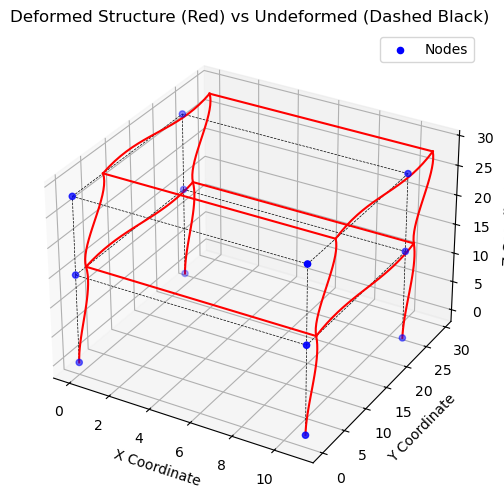

In [24]:
# Create the PlotResults object
plotter = PlotResults(structure, -mode_shape, scale=13)

# Plot the deformed shape
plotter.plot_deformed_shape()